In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import data using Pandas
train = pd.read_csv('train titanic.csv')
test = pd.read_csv('test titanic.csv')

#Print out the first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [7]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:>

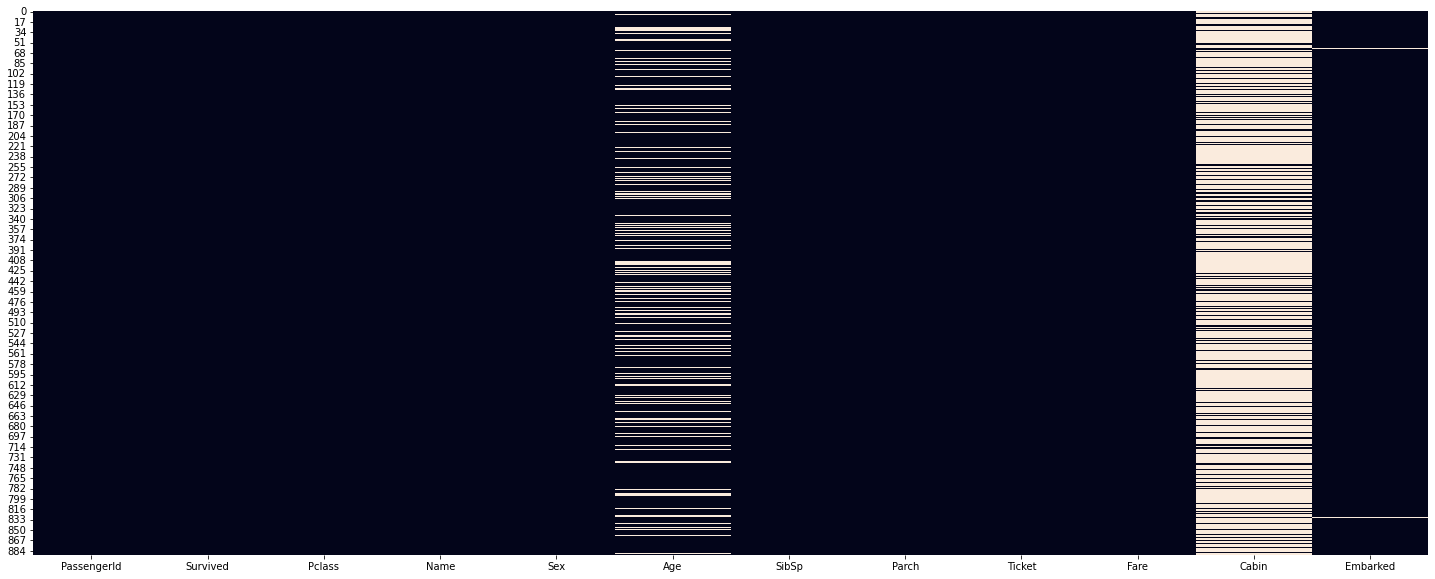

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(train.isna(), cbar=False)

We can see that 'Cabin' has a lot of NaN values, and 'Age' does too.

In [9]:
print('Missing Age:', (train['Age'].isna().sum()/train['Age'].shape[0]))
print('Missing Cabin:', (train['Cabin'].isna().sum()/train['Cabin'].shape[0]))

Missing Age: 0.19865319865319866
Missing Cabin: 0.7710437710437711


We have:
- 891 passengers
- age : 714 values, 19.8 % missing 
- cabin :   values,  77.1 % missing 

### Splitting the data in 2 cases : Survived / Died

In [10]:
survived = train[train['Survived']== 1]
died = train[train['Survived']== 0]

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

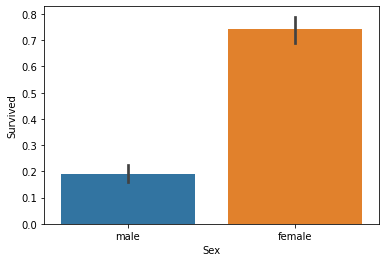

In [11]:
sns.barplot(x="Sex", y="Survived", data=train)

In [12]:
print(train['Age'].unique())
train['Age'].isna().sum()

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


177

The age goes from 0 to 80, with 177 missing values that we can ignore.

29.69911764705882


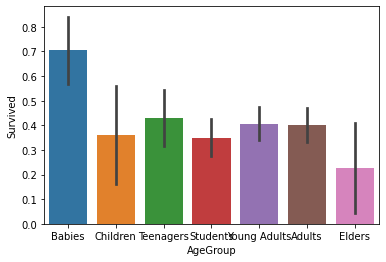

In [14]:
#Categorizing the passengers by age
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]

# Label of age ranges
labels = ['Babies', 'Children', 'Teenagers', 'Students', 'Young Adults', 'Adults', 'Elders']


train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

# Batplot of Age & survival
sns.barplot(x="AgeGroup", y="Survived", data=train)

print(train['Age'].mean())

Babies had more chances of surviving

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

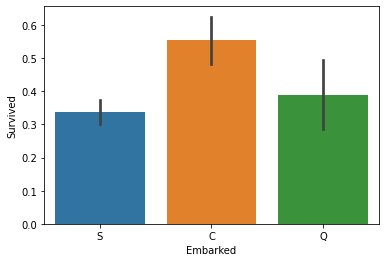

In [16]:
sns.barplot(x="Embarked", y="Survived", data=train)

We can see that the passengers embarked from C had more chances of surviving

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

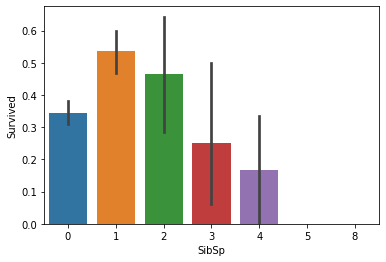

In [17]:
sns.barplot(x="SibSp", y="Survived", data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

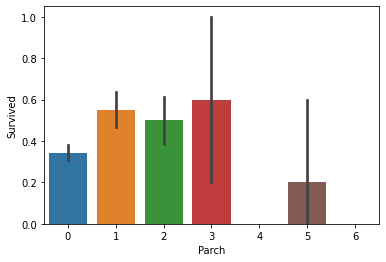

In [18]:
sns.barplot(x="Parch", y="Survived", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

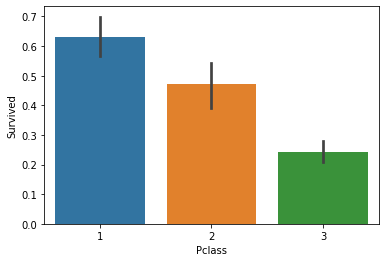

In [19]:
sns.barplot(x="Pclass", y="Survived", data=train)

The more luxurious the class, the more chances the passengers had of surviving.

## Data Pre-processing

In [20]:
#Deleting irrelevant columns: 
train = train.drop(['AgeGroup', 'Name', 'Ticket', 'Cabin'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [47]:
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,892,3,0,34.5,0,0,7.8292,Q,Young Adults
1,893,3,1,47.0,1,0,7.0000,S,Adults
2,894,2,0,62.0,0,0,9.6875,Q,Elders
3,895,3,0,27.0,0,0,8.6625,S,Young Adults
4,896,3,1,22.0,1,1,12.2875,S,Students


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


In [21]:
#Handling categorical values:
train.replace('male', 0, inplace=True)
train.replace('female', 1, inplace=True)
train['Sex'].dtype

dtype('int64')

In [22]:
test.replace('male', 0, inplace=True)
test.replace('female', 1, inplace=True)
test['Sex'].dtype

dtype('int64')

In [23]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


Since we had more passengers from Southampton, we're gonna replace the missing values with it.

In [24]:
# Replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})
train.replace('C', 0, inplace=True)
train.replace('S', 1, inplace=True)
train.replace('Q', 2, inplace=True)
train["Embarked"].dtype

dtype('int64')

In [54]:
test = test.fillna({"Embarked": "S"})
test.replace('C', 0, inplace=True)
test.replace('S', 1, inplace=True)
test.replace('Q', 2, inplace=True)
test["Embarked"].dtype


dtype('int64')

In [25]:
train = train.fillna(train['Age'].mean())

In [64]:
test = test.fillna(test['Age'].mean())

## Evaluation metrics

In [66]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

In [67]:
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [69]:
print(X_train.shape)
print(y_train.shape)

(712, 8)
(712,)


In [70]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

#Evaluation function
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring = 'accuracy',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(15,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='test score')
    plt.legend()

## Model selection

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [72]:
preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_classif, k=10))

In [73]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
Adaboost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))

#Unlike RandomForestClassifier, SVC and KNN need normalized data in order to function

SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [74]:
#A list of our models
models = [RandomForest, Adaboost, SVM, KNN]

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])
0.8156424581005587
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])
0.7988826815642458
Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))]

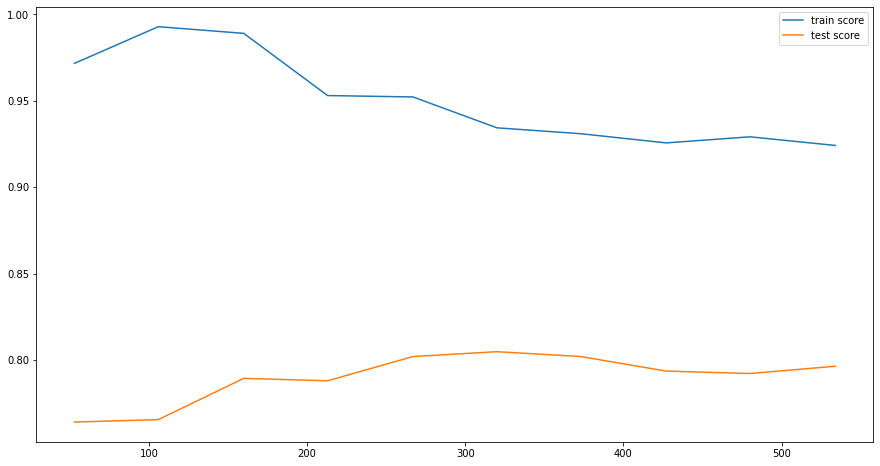

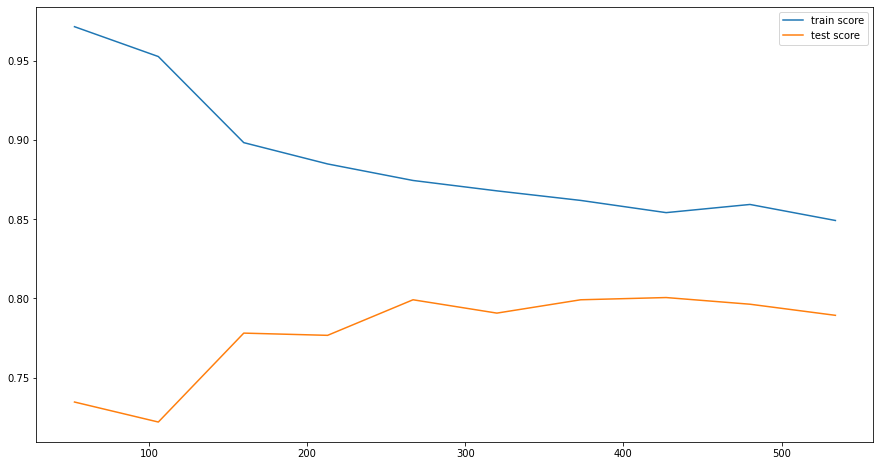

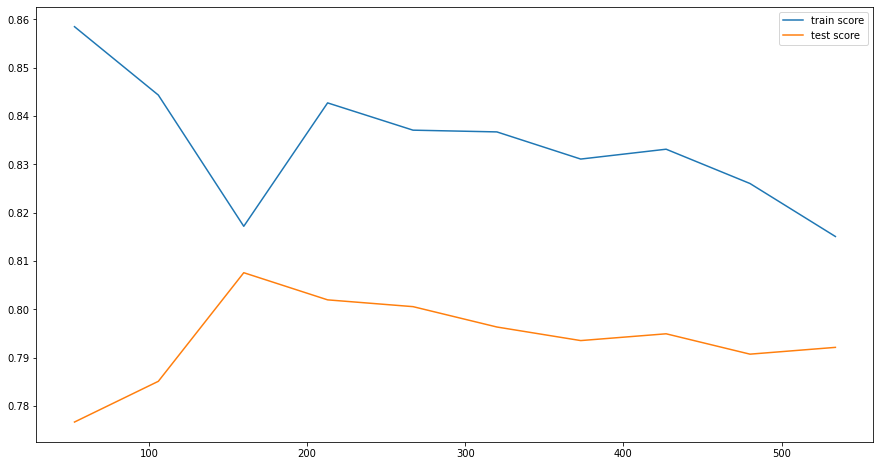

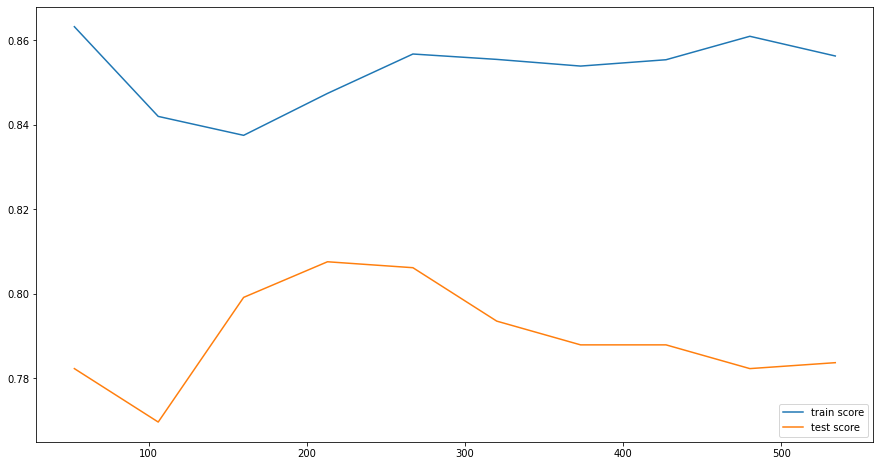

In [75]:
for model in models:
    print(model)
    evaluation(model)

## Model Optimization

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
RandomForest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__polynomialfeatures', 'pipeline__selectkbest', 'pipeline__polynomialfeatures__degree', 'pipeline__polynomialfeatures__include_bias', 'pipeline__polynomialfeatures__interaction_only', 'pipeline__polynomialfeatures__order', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassi

In [78]:
params = {
          'randomforestclassifier__n_estimators': [200, 500],
          'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
          'randomforestclassifier__max_depth' : [4,5,6,7,8],
          'pipeline__polynomialfeatures__degree':[2, 3],
          'pipeline__selectkbest__k': range(45, 60)}

In [45]:
grid = RandomizedSearchCV(RandomForest, params, scoring='accuracy', n_iter=40)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': 7, 'pipeline__selectkbest__k': 54, 'pipeline__polynomialfeatures__degree': 3}


In [46]:
y_pred = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


In [81]:
#Kaggle sub

test_predictions = pd.DataFrame(grid.predict(test), columns = ['Survived'])

submission = pd.concat([test.PassengerId, test_predictions], axis = 1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
submission.to_csv('submission.csv', index = False)